In [74]:
import nltk
import re
from string import digits
import pandas as pd

In [3]:
# read twitter data with keyword remote work
df = pd.read_csv('#all_remote_work_tweets(2019-2022).csv').drop(columns = ['Unnamed: 0', 'states', 'index'], axis = 1)
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,replies,likes,quote_count,geo_name,states_abbrev
0,2729932651,TwelveRivers12,367,1862,We strive to raise the bar of what it means to...,"Austin, TX",#WFH but make it fashion (Twelve Rivers fashio...,2020-12-19 20:00:14+00:00,c3f37afa9efcf94b,1,0,1,1,"Austin, TX",TX
1,483173029,CarrieHOlerich,2138,88698,"Driven, passionate #Communications graduate.🎓📚...","Nebraska, USA",Late night evening #wfh vibes finish my evenin...,2020-12-19 07:12:54+00:00,0fc2e8f588955000,0,0,1,0,Johnny Goodman Golf Course,NaN
2,389908361,JuanC611,214,12248,"I'm a #BCB, craft beer drinkin #Kaskade listen...","Oxnard, CA","Step 2, in progress...\n#wfh #wfhlife @ Riverp...",2020-12-19 02:56:54+00:00,a3c0ae863771d69e,0,0,0,0,"Oxnard, CA",CA
3,737763400118198277,MissionTXperts,828,1618,Follow us on IG! @missiontxperts #FamousForExp...,"Mission, TX",Congratulations on your graduation!!! Welcome ...,2020-12-18 22:35:35+00:00,77633125ba089dcb,1,1,15,1,"Mission, TX",TX
4,522212036,FitnessFoundry,2693,14002,Award Winning Personal Trainer| EMT-B 🚑 NSCA-R...,"Boston and Malden, MA",Part 2 #HomeWorkout \n\n#OldSchool Jumping Jac...,2020-12-18 19:07:33+00:00,75f5a403163f6f95,1,0,1,0,"Malden, MA",MA


In [3]:
# look at data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31965 entries, 0 to 31964
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_id           31965 non-null  int64 
 1   username            31958 non-null  object
 2   author_followers    31965 non-null  int64 
 3   author_tweets       31965 non-null  int64 
 4   author_description  30868 non-null  object
 5   author_location     30154 non-null  object
 6   text                31965 non-null  object
 7   created_at          31965 non-null  object
 8   geo_id              31965 non-null  object
 9   retweets            31965 non-null  int64 
 10  replies             31965 non-null  int64 
 11  likes               31965 non-null  int64 
 12  quote_count         31965 non-null  int64 
 13  geo_name            31965 non-null  object
 14  states_abbrev       30392 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [4]:
import string
string.punctuation
def clean_text(text):
    '''
    text cleaning, remove numbers, url, punctuation, newline, special characters
    '''
    text = text.lower()
    text = ''.join([i for i in text if not i.isdigit()])
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', '', text)
    tweet = re.sub('\w*\d\w*', '', text)
    clean_text = re.sub("@[A-Za-z0-9_]+","", tweet)
    clean_text = re.sub("#[A-Za-z0-9_]+","", clean_text)
    clean_text = re.sub(r'http\S+', '', clean_text)
    return clean_text

def text_preprocessing(text):
    '''
    preprocessing text
    '''
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunct = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunct)
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [5]:
df['clean_text'] = df['text'].apply(lambda x: text_preprocessing(x))
df

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,replies,likes,quote_count,geo_name,states_abbrev,clean_text
0,2729932651,TwelveRivers12,367,1862,We strive to raise the bar of what it means to...,"Austin, TX",#WFH but make it fashion (Twelve Rivers fashio...,2020-12-19 20:00:14+00:00,c3f37afa9efcf94b,1,0,1,1,"Austin, TX",TX,wfh but make it fashion twelve rivers fashion ...
1,483173029,CarrieHOlerich,2138,88698,"Driven, passionate #Communications graduate.🎓📚...","Nebraska, USA",Late night evening #wfh vibes finish my evenin...,2020-12-19 07:12:54+00:00,0fc2e8f588955000,0,0,1,0,Johnny Goodman Golf Course,NaN,late night evening wfh vibes finish my evening...
2,389908361,JuanC611,214,12248,"I'm a #BCB, craft beer drinkin #Kaskade listen...","Oxnard, CA","Step 2, in progress...\n#wfh #wfhlife @ Riverp...",2020-12-19 02:56:54+00:00,a3c0ae863771d69e,0,0,0,0,"Oxnard, CA",CA,step in progress wfh wfhlife riverpark
3,737763400118198277,MissionTXperts,828,1618,Follow us on IG! @missiontxperts #FamousForExp...,"Mission, TX",Congratulations on your graduation!!! Welcome ...,2020-12-18 22:35:35+00:00,77633125ba089dcb,1,1,15,1,"Mission, TX",TX,congratulations on your graduation welcome to ...
4,522212036,FitnessFoundry,2693,14002,Award Winning Personal Trainer| EMT-B 🚑 NSCA-R...,"Boston and Malden, MA",Part 2 #HomeWorkout \n\n#OldSchool Jumping Jac...,2020-12-18 19:07:33+00:00,75f5a403163f6f95,1,0,1,0,"Malden, MA",MA,part homeworkout oldschool jumping jack variat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31960,2398266878,realNickWake,395,7586,"#Michiganian / #Michigander, Ardent #Capitalis...","Michigan, USA",@rstudley Open up businesses to determine what...,2021-03-01 16:05:06+00:00,6231ced9cc2b96aa,2,0,1,0,"Grandville, MI",MI,rstudley open up businesses to determine what ...
31961,1180842344,ksgates__,702,7563,Marketing & Membership at LCC | @CMAA | Perman...,NaN,Gearing up for a busy spring welcoming new mem...,2021-03-01 15:55:28+00:00,27c45d804c777999,0,0,1,0,"Kansas, USA",KS,gearing up for a busy spring welcoming new mem...
31962,17499112,ahurwitz03,207,1796,PSA: my new favorite color is green 💚 meow - U...,Vermont,Wearing carhartts today to pretend like I’m do...,2021-03-01 13:28:16+00:00,9aa25269f04766ab,0,0,2,0,"Vermont, USA",VT,wearing carhartts today to pretend like i m do...
31963,483173029,CarrieHOlerich,2141,89128,"Driven, passionate #Communications graduate.🎓📚...","Nebraska, USA",If laying on the sofa laughing about Twtter du...,2021-03-01 07:41:20+00:00,a84b808ce3f11719,0,0,1,0,"Omaha, NE",NE,if laying on the sofa laughing about twtter du...


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['no_stopwords_text'] = df['clean_text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
hashtag = ['wfh', 'remotework', 'workfromhome', 'workingfromhome', 'remoteworking', 'telecommuting']
def remove_hashtag(text):
    return " ".join([word for word in str(text).split() if word not in hashtag])
df['no_remotework_text'] = df['no_stopwords_text'].apply(lambda x: remove_hashtag(x))

In [8]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lem_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['lematize_text'] = df['no_remotework_text'].apply(lambda x: lem_words(x))

[nltk_data] Downloading package wordnet to /Users/yanshi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,replies,likes,quote_count,geo_name,states_abbrev,clean_text,no_stopwords_text,no_remotework_text,lematize_text
0,2729932651,TwelveRivers12,367,1862,We strive to raise the bar of what it means to...,"Austin, TX",#WFH but make it fashion (Twelve Rivers fashio...,2020-12-19 20:00:14+00:00,c3f37afa9efcf94b,1,0,1,1,"Austin, TX",TX,wfh but make it fashion twelve rivers fashion ...,wfh make fashion twelve rivers fashion office ...,make fashion twelve rivers fashion office big ...,make fashion twelve river fashion office big g...
1,483173029,CarrieHOlerich,2138,88698,"Driven, passionate #Communications graduate.🎓📚...","Nebraska, USA",Late night evening #wfh vibes finish my evenin...,2020-12-19 07:12:54+00:00,0fc2e8f588955000,0,0,1,0,Johnny Goodman Golf Course,NaN,late night evening wfh vibes finish my evening...,late night evening wfh vibes finish evening wf...,late night evening vibes finish evening wfhlife,late night evening vibe finish evening wfhlife
2,389908361,JuanC611,214,12248,"I'm a #BCB, craft beer drinkin #Kaskade listen...","Oxnard, CA","Step 2, in progress...\n#wfh #wfhlife @ Riverp...",2020-12-19 02:56:54+00:00,a3c0ae863771d69e,0,0,0,0,"Oxnard, CA",CA,step in progress wfh wfhlife riverpark,step progress wfh wfhlife riverpark,step progress wfhlife riverpark,step progress wfhlife riverpark
3,737763400118198277,MissionTXperts,828,1618,Follow us on IG! @missiontxperts #FamousForExp...,"Mission, TX",Congratulations on your graduation!!! Welcome ...,2020-12-18 22:35:35+00:00,77633125ba089dcb,1,1,15,1,"Mission, TX",TX,congratulations on your graduation welcome to ...,congratulations graduation welcome missiontxpe...,congratulations graduation welcome missiontxpe...,congratulation graduation welcome missiontxper...
4,522212036,FitnessFoundry,2693,14002,Award Winning Personal Trainer| EMT-B 🚑 NSCA-R...,"Boston and Malden, MA",Part 2 #HomeWorkout \n\n#OldSchool Jumping Jac...,2020-12-18 19:07:33+00:00,75f5a403163f6f95,1,0,1,0,"Malden, MA",MA,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...


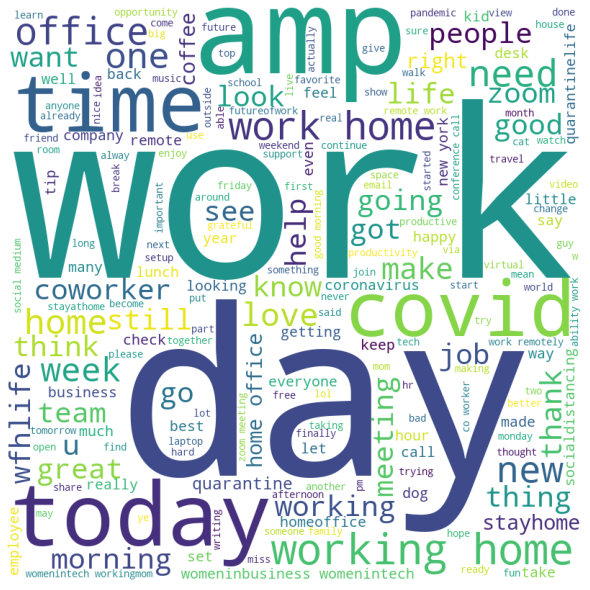

In [10]:
#generate word cloud
tweets = ''
for tweet in df['lematize_text'].values:
    tweets += ''.join(tweet)+' '
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

There are some positive emoiton words associate with remote work tweet, such as love, best, great, flexible

In [11]:
from datetime import datetime
from datetime import timedelta
#convert date str to datetime
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%z').date())
df['month'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
#create new column indicate # of tweet
df['tweet'] = 1

In [48]:
df['Date'] = pd.to_datetime(df['date'], errors='coerce')
per = df.Date.dt.to_period("M")
df_aggre = df.groupby(per).sum()
df_aggre

,author_id,author_followers,author_tweets,retweets,replies,likes,quote_count,month,tweet
Date,,,,,,,,,
2019-03,7.438393e+19,343788.0,2170734.0,183.0,47.0,628.0,17.0,732,244
2019-04,4.046708e+19,928765.0,3378692.0,90.0,41.0,405.0,17.0,948,237
2019-05,3.972946e+19,352691.0,2379015.0,61.0,38.0,360.0,6.0,1145,229
2019-06,4.395675e+19,1183557.0,7955395.0,78.0,37.0,424.0,3.0,1584,264
2019-07,3.932131e+19,1360104.0,18625242.0,90.0,75.0,714.0,8.0,3269,467
2019-08,4.410848e+19,1357105.0,6326535.0,117.0,71.0,554.0,10.0,1784,223
2019-09,3.765725e+19,1002927.0,3209900.0,88.0,62.0,352.0,9.0,1926,214
2019-10,3.544762e+19,768274.0,5372587.0,84.0,35.0,312.0,8.0,2360,236
2019-11,2.258816e+19,1078118.0,3426775.0,44.0,47.0,501.0,10.0,1969,179


In [56]:
df_aggre = df_aggre.drop(columns = ['author_id', 'author_followers', 'author_tweets', 'month', 'quote_count'])
#df_aggre['date'] = df_aggre.index
#df_aggre = df_aggre.reset_index(drop = True)

In [50]:
df_aggre.index = df_aggre.index.map(str)

In [117]:
#general statistic for monthly data
df_aggre.describe()

,retweets,replies,likes,quote_count,#tweet,tweet,month
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,278.416667,205.166667,1941.166667,45.916667,339.166667,339.166667,6.500000
std,253.683216,153.817385,1768.247557,33.494798,282.504331,282.504331,3.605551
min,78.000000,87.000000,733.000000,13.000000,98.000000,98.000000,1.000000
25%,115.000000,122.750000,776.000000,23.250000,180.500000,180.500000,3.750000
50%,184.500000,169.500000,1297.500000,36.000000,260.500000,260.500000,6.500000
75%,324.500000,227.500000,2176.000000,66.500000,402.250000,402.250000,9.250000
max,977.000000,664.000000,6739.000000,127.000000,1160.000000,1160.000000,12.000000


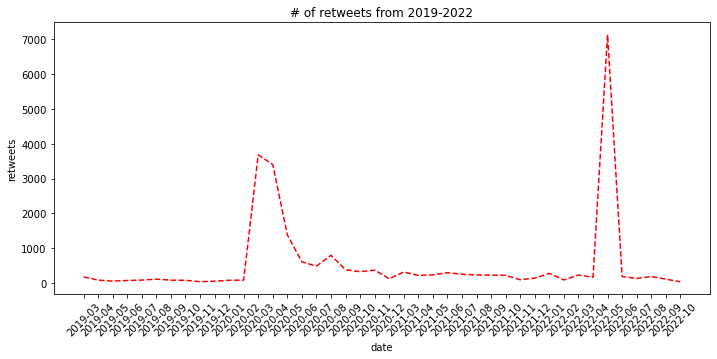

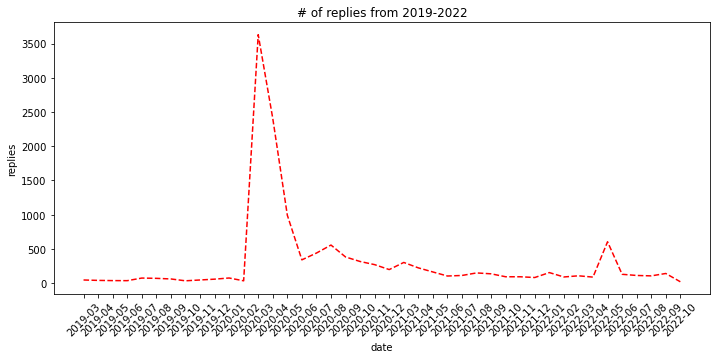

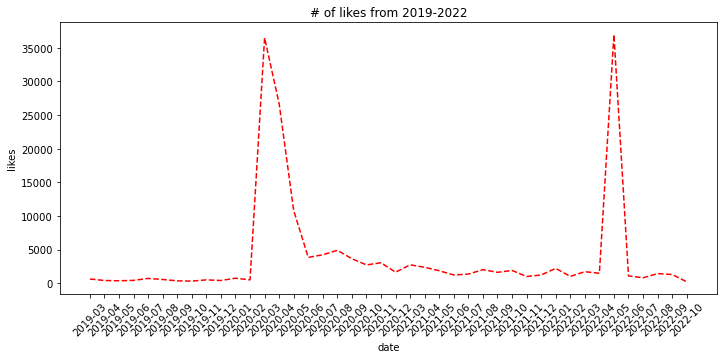

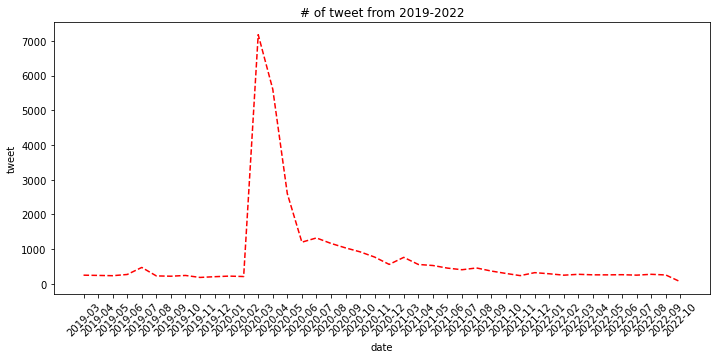

In [58]:
#simple plot data
import matplotlib.pyplot as plt
for column in df_aggre.columns:
    plt.figure(figsize=(40, 5))
    plt.subplot(132)
    plt.plot(df_aggre[column],'r--')
    plt.ylabel(column)
    plt.xlabel('date')
    plt.tick_params(axis='x', labelrotation = 45)
    plt.title('# of '+column+' from 2019-2022')

In [52]:
from datetime import date
df_second_peak = df[(date(2022, 3, 1)< df['date']) & (df['date'] < date(2022, 6, 1))]
df_second_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 25539 to 30069
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author_id           768 non-null    int64  
 1   username            768 non-null    object 
 2   author_followers    768 non-null    int64  
 3   author_tweets       768 non-null    int64  
 4   author_description  741 non-null    object 
 5   author_location     714 non-null    object 
 6   text                768 non-null    object 
 7   created_at          768 non-null    object 
 8   geo_id              768 non-null    object 
 9   retweets            768 non-null    int64  
 10  replies             768 non-null    int64  
 11  likes               768 non-null    int64  
 12  quote_count         768 non-null    int64  
 13  geo_name            768 non-null    object 
 14  states_abbrev       734 non-null    object 
 15  clean_text          768 non-null    object 
 16  no

In [69]:
# topic model
import gensim
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim.corpora as corpora
def sent_to_words(sentences):
    '''
    tokenize words
    '''
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(df_second_peak['lematize_text'].values.tolist()))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                      update_every=1,
                                      chunksize=100,
                                      passes=10,
                                      alpha='auto')

INFO 2022-10-28 14:59:41,055 dictionary.py:201] adding document #0 to Dictionary<0 unique tokens: []>
INFO 2022-10-28 14:59:41,070 dictionary.py:206] built Dictionary<4059 unique tokens: ['advice', 'blackintech', 'coding', 'comment', 'computerscience']...> from 768 documents (total 10300 corpus positions)
INFO 2022-10-28 14:59:41,071 utils.py:448] Dictionary lifecycle event {'msg': "built Dictionary<4059 unique tokens: ['advice', 'blackintech', 'coding', 'comment', 'computerscience']...> from 768 documents (total 10300 corpus positions)", 'datetime': '2022-10-28T14:59:41.070998', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO 2022-10-28 14:59:41,079 ldamodel.py:595] using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
INFO 2022-10-28 14:59:41,079 ldamodel.py:576] using symmetric eta at 0.2
INFO 2022-10-28 14:59:41,080 ldamodel.py:481] using serial LDA version on thi

INFO 2022-10-28 14:59:41,313 ldamodel.py:1196] topic #2 (0.178): 0.015*"job" + 0.014*"realestate" + 0.013*"entrepreneur" + 0.013*"day" + 0.013*"another" + 0.009*"sunday" + 0.007*"morning" + 0.007*"way" + 0.006*"home" + 0.006*"let"
INFO 2022-10-28 14:59:41,314 ldamodel.py:1196] topic #3 (0.222): 0.036*"work" + 0.021*"home" + 0.016*"office" + 0.011*"working" + 0.011*"today" + 0.009*"back" + 0.009*"like" + 0.007*"new" + 0.007*"still" + 0.006*"week"
INFO 2022-10-28 14:59:41,314 ldamodel.py:1196] topic #4 (0.139): 0.013*"california" + 0.011*"done" + 0.011*"home" + 0.010*"group" + 0.010*"sold" + 0.010*"ready" + 0.009*"souza" + 0.009*"homesales" + 0.009*"listed" + 0.009*"soldgetting"
INFO 2022-10-28 14:59:41,315 ldamodel.py:1074] topic diff=0.520142, rho=0.447214
INFO 2022-10-28 14:59:41,315 ldamodel.py:1001] PROGRESS: pass 0, at document #600/768
INFO 2022-10-28 14:59:41,351 ldamodel.py:794] optimized alpha [0.17977357, 0.20402989, 0.17562437, 0.24766779, 0.14495757]
INFO 2022-10-28 14:59:41

INFO 2022-10-28 14:59:41,511 ldamodel.py:1074] topic diff=0.438547, rho=0.321412
INFO 2022-10-28 14:59:41,512 ldamodel.py:1001] PROGRESS: pass 1, at document #300/768
INFO 2022-10-28 14:59:41,537 ldamodel.py:794] optimized alpha [0.1882309, 0.20935552, 0.18632987, 0.27986538, 0.14232595]
INFO 2022-10-28 14:59:41,538 ldamodel.py:233] merging changes from 100 documents into a model of 768 documents
INFO 2022-10-28 14:59:41,539 ldamodel.py:1196] topic #0 (0.188): 0.017*"work" + 0.016*"business" + 0.009*"career" + 0.009*"money" + 0.009*"dream" + 0.009*"life" + 0.009*"love" + 0.008*"like" + 0.008*"company" + 0.008*"job"
INFO 2022-10-28 14:59:41,539 ldamodel.py:1196] topic #1 (0.209): 0.021*"work" + 0.014*"time" + 0.012*"meeting" + 0.011*"home" + 0.010*"coffee" + 0.007*"got" + 0.007*"nowhiring" + 0.007*"need" + 0.006*"team" + 0.006*"much"
INFO 2022-10-28 14:59:41,540 ldamodel.py:1196] topic #2 (0.186): 0.012*"morning" + 0.010*"day" + 0.009*"long" + 0.009*"entrepreneur" + 0.008*"follow" + 0.0

INFO 2022-10-28 14:59:41,693 ldamodel.py:1196] topic #1 (0.242): 0.012*"meeting" + 0.011*"time" + 0.011*"work" + 0.010*"need" + 0.010*"team" + 0.010*"zoom" + 0.008*"home" + 0.007*"coffee" + 0.007*"got" + 0.006*"desk"
INFO 2022-10-28 14:59:41,694 ldamodel.py:1196] topic #2 (0.192): 0.011*"morning" + 0.008*"way" + 0.008*"new" + 0.008*"think" + 0.008*"day" + 0.008*"let" + 0.008*"long" + 0.007*"another" + 0.007*"spring" + 0.006*"open"
INFO 2022-10-28 14:59:41,694 ldamodel.py:1196] topic #3 (0.364): 0.026*"work" + 0.024*"office" + 0.018*"day" + 0.018*"home" + 0.014*"back" + 0.013*"working" + 0.010*"one" + 0.010*"new" + 0.010*"today" + 0.008*"week"
INFO 2022-10-28 14:59:41,695 ldamodel.py:1196] topic #4 (0.143): 0.015*"california" + 0.010*"employee" + 0.009*"covid" + 0.008*"beach" + 0.008*"done" + 0.006*"home" + 0.006*"afternoon" + 0.005*"lunchtime" + 0.005*"corporate" + 0.005*"environment"
INFO 2022-10-28 14:59:41,695 ldamodel.py:1074] topic diff=0.310045, rho=0.321412
INFO 2022-10-28 14:59

INFO 2022-10-28 14:59:41,839 ldamodel.py:1196] topic #4 (0.139): 0.017*"california" + 0.014*"done" + 0.012*"home" + 0.011*"group" + 0.010*"job" + 0.010*"sold" + 0.010*"realestate" + 0.009*"souza" + 0.009*"listed" + 0.009*"realtorlife"
INFO 2022-10-28 14:59:41,840 ldamodel.py:1074] topic diff=0.260716, rho=0.305995
INFO 2022-10-28 14:59:41,840 ldamodel.py:1001] PROGRESS: pass 2, at document #600/768
INFO 2022-10-28 14:59:41,862 ldamodel.py:794] optimized alpha [0.19722223, 0.23845957, 0.18507709, 0.3410467, 0.14272004]
INFO 2022-10-28 14:59:41,863 ldamodel.py:233] merging changes from 100 documents into a model of 768 documents
INFO 2022-10-28 14:59:41,865 ldamodel.py:1196] topic #0 (0.197): 0.015*"go" + 0.013*"work" + 0.012*"love" + 0.011*"life" + 0.011*"job" + 0.009*"make" + 0.009*"trying" + 0.009*"today" + 0.008*"get" + 0.008*"day"
INFO 2022-10-28 14:59:41,866 ldamodel.py:1196] topic #1 (0.238): 0.014*"work" + 0.012*"time" + 0.012*"meeting" + 0.011*"need" + 0.010*"home" + 0.008*"much

INFO 2022-10-28 14:59:42,014 ldamodel.py:233] merging changes from 100 documents into a model of 768 documents
INFO 2022-10-28 14:59:42,016 ldamodel.py:1196] topic #0 (0.195): 0.015*"business" + 0.015*"work" + 0.011*"job" + 0.009*"career" + 0.009*"life" + 0.009*"company" + 0.009*"money" + 0.008*"dream" + 0.008*"like" + 0.008*"success"
INFO 2022-10-28 14:59:42,016 ldamodel.py:1196] topic #1 (0.220): 0.019*"work" + 0.012*"meeting" + 0.012*"time" + 0.011*"home" + 0.010*"coffee" + 0.007*"need" + 0.007*"got" + 0.007*"team" + 0.007*"much" + 0.007*"nowhiring"
INFO 2022-10-28 14:59:42,017 ldamodel.py:1196] topic #2 (0.180): 0.012*"morning" + 0.009*"long" + 0.009*"day" + 0.008*"let" + 0.008*"entrepreneur" + 0.007*"place" + 0.006*"think" + 0.006*"another" + 0.006*"way" + 0.006*"texas"
INFO 2022-10-28 14:59:42,017 ldamodel.py:1196] topic #3 (0.326): 0.041*"work" + 0.022*"office" + 0.021*"home" + 0.012*"day" + 0.011*"working" + 0.011*"like" + 0.010*"back" + 0.010*"remote" + 0.009*"today" + 0.008*"

INFO 2022-10-28 14:59:42,165 ldamodel.py:1196] topic #2 (0.186): 0.011*"new" + 0.010*"morning" + 0.008*"way" + 0.008*"think" + 0.008*"let" + 0.008*"long" + 0.007*"another" + 0.007*"day" + 0.006*"spring" + 0.006*"open"
INFO 2022-10-28 14:59:42,165 ldamodel.py:1196] topic #3 (0.389): 0.028*"work" + 0.024*"office" + 0.020*"day" + 0.018*"home" + 0.013*"back" + 0.012*"working" + 0.010*"one" + 0.010*"today" + 0.009*"week" + 0.008*"new"
INFO 2022-10-28 14:59:42,166 ldamodel.py:1196] topic #4 (0.137): 0.015*"california" + 0.010*"done" + 0.010*"employee" + 0.009*"covid" + 0.008*"beach" + 0.006*"home" + 0.005*"afternoon" + 0.005*"corporate" + 0.005*"environment" + 0.005*"lunchtime"
INFO 2022-10-28 14:59:42,167 ldamodel.py:1074] topic diff=0.200569, rho=0.292603
INFO 2022-10-28 14:59:42,167 ldamodel.py:1001] PROGRESS: pass 4, at document #100/768
INFO 2022-10-28 14:59:42,189 ldamodel.py:794] optimized alpha [0.19585069, 0.21535587, 0.17435808, 0.35555747, 0.13378218]
INFO 2022-10-28 14:59:42,190 

INFO 2022-10-28 14:59:42,298 ldamodel.py:1074] topic diff=0.192729, rho=0.280828
INFO 2022-10-28 14:59:42,299 ldamodel.py:1001] PROGRESS: pass 4, at document #600/768
INFO 2022-10-28 14:59:42,317 ldamodel.py:794] optimized alpha [0.19841008, 0.2352511, 0.18128434, 0.35965866, 0.13781807]
INFO 2022-10-28 14:59:42,319 ldamodel.py:233] merging changes from 100 documents into a model of 768 documents
INFO 2022-10-28 14:59:42,320 ldamodel.py:1196] topic #0 (0.198): 0.014*"go" + 0.012*"job" + 0.012*"work" + 0.012*"love" + 0.011*"life" + 0.009*"make" + 0.009*"trying" + 0.009*"today" + 0.008*"get" + 0.008*"business"
INFO 2022-10-28 14:59:42,321 ldamodel.py:1196] topic #1 (0.235): 0.013*"work" + 0.012*"meeting" + 0.011*"need" + 0.011*"time" + 0.009*"home" + 0.008*"much" + 0.007*"get" + 0.006*"zoom" + 0.006*"today" + 0.006*"desk"
INFO 2022-10-28 14:59:42,322 ldamodel.py:1196] topic #2 (0.181): 0.009*"another" + 0.008*"let" + 0.008*"way" + 0.008*"entrepreneur" + 0.008*"day" + 0.007*"morning" + 0.

INFO 2022-10-28 14:59:42,462 ldamodel.py:1196] topic #1 (0.218): 0.018*"work" + 0.012*"meeting" + 0.011*"time" + 0.010*"home" + 0.009*"coffee" + 0.008*"need" + 0.007*"got" + 0.007*"team" + 0.007*"much" + 0.006*"nowhiring"
INFO 2022-10-28 14:59:42,462 ldamodel.py:1196] topic #2 (0.178): 0.011*"morning" + 0.009*"long" + 0.008*"day" + 0.008*"let" + 0.008*"entrepreneur" + 0.007*"place" + 0.006*"think" + 0.006*"another" + 0.006*"way" + 0.006*"tuesday"
INFO 2022-10-28 14:59:42,463 ldamodel.py:1196] topic #3 (0.336): 0.041*"work" + 0.023*"office" + 0.021*"home" + 0.013*"day" + 0.012*"working" + 0.010*"like" + 0.010*"back" + 0.009*"remote" + 0.009*"today" + 0.008*"time"
INFO 2022-10-28 14:59:42,463 ldamodel.py:1196] topic #4 (0.133): 0.022*"california" + 0.009*"done" + 0.008*"home" + 0.008*"job" + 0.006*"realestate" + 0.006*"group" + 0.006*"sold" + 0.006*"corporate" + 0.006*"listed" + 0.006*"cloudoffice"
INFO 2022-10-28 14:59:42,464 ldamodel.py:1074] topic diff=0.216919, rho=0.270369
INFO 2022

INFO 2022-10-28 14:59:42,591 ldamodel.py:1196] topic #3 (0.393): 0.029*"work" + 0.024*"office" + 0.020*"day" + 0.019*"home" + 0.013*"back" + 0.012*"working" + 0.010*"today" + 0.010*"one" + 0.009*"week" + 0.008*"new"
INFO 2022-10-28 14:59:42,591 ldamodel.py:1196] topic #4 (0.134): 0.015*"california" + 0.010*"done" + 0.010*"employee" + 0.009*"covid" + 0.008*"beach" + 0.006*"home" + 0.005*"corporate" + 0.005*"job" + 0.005*"afternoon" + 0.005*"ready"
INFO 2022-10-28 14:59:42,592 ldamodel.py:1074] topic diff=0.162709, rho=0.270369
INFO 2022-10-28 14:59:42,592 ldamodel.py:1001] PROGRESS: pass 6, at document #100/768
INFO 2022-10-28 14:59:42,610 ldamodel.py:794] optimized alpha [0.1959316, 0.21406846, 0.17277643, 0.36133376, 0.13107122]
INFO 2022-10-28 14:59:42,611 ldamodel.py:233] merging changes from 100 documents into a model of 768 documents
INFO 2022-10-28 14:59:42,612 ldamodel.py:1196] topic #0 (0.196): 0.011*"job" + 0.011*"work" + 0.010*"life" + 0.010*"go" + 0.010*"make" + 0.008*"love"

INFO 2022-10-28 14:59:42,724 ldamodel.py:794] optimized alpha [0.19811966, 0.23223309, 0.1797873, 0.36490142, 0.13491707]
INFO 2022-10-28 14:59:42,725 ldamodel.py:233] merging changes from 100 documents into a model of 768 documents
INFO 2022-10-28 14:59:42,726 ldamodel.py:1196] topic #0 (0.198): 0.014*"go" + 0.012*"job" + 0.012*"work" + 0.011*"love" + 0.011*"life" + 0.009*"make" + 0.009*"trying" + 0.009*"today" + 0.008*"business" + 0.008*"get"
INFO 2022-10-28 14:59:42,727 ldamodel.py:1196] topic #1 (0.232): 0.013*"work" + 0.012*"meeting" + 0.011*"need" + 0.010*"time" + 0.009*"home" + 0.008*"much" + 0.007*"get" + 0.007*"zoom" + 0.006*"desk" + 0.006*"got"
INFO 2022-10-28 14:59:42,728 ldamodel.py:1196] topic #2 (0.180): 0.009*"another" + 0.008*"let" + 0.008*"way" + 0.008*"entrepreneur" + 0.008*"day" + 0.007*"think" + 0.007*"morning" + 0.007*"long" + 0.006*"job" + 0.006*"tuesday"
INFO 2022-10-28 14:59:42,728 ldamodel.py:1196] topic #3 (0.365): 0.033*"work" + 0.022*"office" + 0.021*"home" 

INFO 2022-10-28 14:59:42,882 ldamodel.py:1196] topic #2 (0.176): 0.011*"morning" + 0.009*"long" + 0.008*"let" + 0.008*"day" + 0.008*"entrepreneur" + 0.007*"place" + 0.006*"think" + 0.006*"another" + 0.006*"way" + 0.006*"new"
INFO 2022-10-28 14:59:42,882 ldamodel.py:1196] topic #3 (0.340): 0.040*"work" + 0.023*"office" + 0.021*"home" + 0.014*"day" + 0.012*"working" + 0.010*"back" + 0.010*"like" + 0.009*"today" + 0.009*"time" + 0.009*"remote"
INFO 2022-10-28 14:59:42,883 ldamodel.py:1196] topic #4 (0.131): 0.021*"california" + 0.009*"done" + 0.008*"home" + 0.007*"job" + 0.006*"realestate" + 0.006*"beach" + 0.006*"group" + 0.006*"corporate" + 0.006*"sold" + 0.005*"souza"
INFO 2022-10-28 14:59:42,883 ldamodel.py:1074] topic diff=0.192486, rho=0.252538
INFO 2022-10-28 14:59:42,884 ldamodel.py:1001] PROGRESS: pass 7, at document #400/768
INFO 2022-10-28 14:59:42,905 ldamodel.py:794] optimized alpha [0.1926478, 0.21691357, 0.18134464, 0.35671562, 0.12983914]
INFO 2022-10-28 14:59:42,907 ldamo

INFO 2022-10-28 14:59:43,020 ldamodel.py:1074] topic diff=0.143590, rho=0.252538
INFO 2022-10-28 14:59:43,020 ldamodel.py:1001] PROGRESS: pass 8, at document #100/768
INFO 2022-10-28 14:59:43,040 ldamodel.py:794] optimized alpha [0.19523601, 0.21186434, 0.17213966, 0.36104685, 0.12920968]
INFO 2022-10-28 14:59:43,041 ldamodel.py:233] merging changes from 100 documents into a model of 768 documents
INFO 2022-10-28 14:59:43,043 ldamodel.py:1196] topic #0 (0.195): 0.011*"job" + 0.011*"work" + 0.010*"life" + 0.010*"go" + 0.010*"make" + 0.008*"love" + 0.008*"people" + 0.007*"business" + 0.007*"day" + 0.007*"today"
INFO 2022-10-28 14:59:43,043 ldamodel.py:1196] topic #1 (0.212): 0.012*"meeting" + 0.012*"work" + 0.010*"need" + 0.008*"team" + 0.008*"zoom" + 0.008*"coffee" + 0.007*"time" + 0.007*"much" + 0.007*"home" + 0.006*"even"
INFO 2022-10-28 14:59:43,044 ldamodel.py:1196] topic #2 (0.172): 0.009*"new" + 0.009*"morning" + 0.007*"way" + 0.007*"another" + 0.006*"think" + 0.006*"let" + 0.006*

INFO 2022-10-28 14:59:43,171 ldamodel.py:1196] topic #1 (0.227): 0.014*"work" + 0.012*"meeting" + 0.011*"need" + 0.009*"home" + 0.008*"time" + 0.008*"much" + 0.007*"get" + 0.007*"zoom" + 0.006*"got" + 0.006*"coffee"
INFO 2022-10-28 14:59:43,172 ldamodel.py:1196] topic #2 (0.179): 0.009*"another" + 0.008*"let" + 0.008*"entrepreneur" + 0.008*"way" + 0.008*"day" + 0.007*"morning" + 0.007*"think" + 0.007*"long" + 0.006*"job" + 0.006*"tuesday"
INFO 2022-10-28 14:59:43,172 ldamodel.py:1196] topic #3 (0.361): 0.033*"work" + 0.022*"office" + 0.021*"home" + 0.014*"day" + 0.014*"working" + 0.012*"today" + 0.009*"like" + 0.009*"back" + 0.009*"week" + 0.008*"time"
INFO 2022-10-28 14:59:43,173 ldamodel.py:1196] topic #4 (0.133): 0.018*"california" + 0.014*"done" + 0.010*"home" + 0.008*"realestate" + 0.008*"job" + 0.008*"group" + 0.007*"sold" + 0.007*"covid" + 0.007*"realestateagent" + 0.007*"soldgetting"
INFO 2022-10-28 14:59:43,173 ldamodel.py:1074] topic diff=0.181754, rho=0.244851
INFO 2022-10-2

INFO 2022-10-28 14:59:43,312 ldamodel.py:1196] topic #4 (0.127): 0.017*"california" + 0.009*"done" + 0.008*"home" + 0.007*"job" + 0.006*"realestate" + 0.006*"beach" + 0.006*"group" + 0.006*"corporate" + 0.006*"sold" + 0.005*"realtorlife"
INFO 2022-10-28 14:59:43,312 ldamodel.py:1074] topic diff=0.175399, rho=0.237826
INFO 2022-10-28 14:59:43,313 ldamodel.py:1001] PROGRESS: pass 9, at document #400/768
INFO 2022-10-28 14:59:43,330 ldamodel.py:794] optimized alpha [0.19129007, 0.21349482, 0.1801305, 0.35095918, 0.12550944]
INFO 2022-10-28 14:59:43,331 ldamodel.py:233] merging changes from 100 documents into a model of 768 documents
INFO 2022-10-28 14:59:43,332 ldamodel.py:1196] topic #0 (0.191): 0.014*"love" + 0.013*"work" + 0.012*"job" + 0.012*"business" + 0.009*"life" + 0.009*"go" + 0.009*"good" + 0.009*"today" + 0.008*"entrepreneur" + 0.008*"dream"
INFO 2022-10-28 14:59:43,333 ldamodel.py:1196] topic #1 (0.213): 0.015*"work" + 0.011*"meeting" + 0.010*"need" + 0.009*"home" + 0.008*"muc

In [70]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.158960 -0.171902       1        1  30.523375
1     -0.018825  0.205046       2        1  20.697000
0     -0.101200 -0.165849       3        1  18.735076
2     -0.202967  0.042615       4        1  16.547771
4      0.164032  0.090089       5        1  13.496779, topic_info=            Term        Freq       Total Category  logprob  loglift
38        office   77.000000   77.000000  Default  30.0000  30.0000
242         back   39.000000   39.000000  Default  29.0000  29.0000
882         life   25.000000   25.000000  Default  28.0000  28.0000
42          work  143.000000  143.000000  Default  27.0000  27.0000
135         home   85.000000   85.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
791   realestate    7.433500    9.995687   Topic5  -5.2312   1.7066
1657        icon    5.871832    7.985087   Topic5  -5.4670   1.6953
1664  souzagroup    5.871832    7.985087   Topic5  -5.4670   1.6953
18           job    7.953680   40.355025   Topic5  -5.1635   0.3786
135         home    9.080632   85.622393   Topic5  -5.0310  -0.2411

[251 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2098      4  0.836541  accessory
749       5  0.962558  afternoon
329       1  0.874951       also
80        1  0.214249        amp
80        2  0.367284        amp
...     ...       ...        ...
298       1  0.726633       year
298       3  0.229463       year
298       5  0.038244       year
888       3  0.978186        yes
396       2  0.971014       zoom

[271 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 5])

In [73]:
df_second_peak.sort_values(by = ['likes'])[:20]['lematize_text']

27366    covering base today lol get mind boost discoun...
27405    ultra moisturizing body lotion also available ...
27404    true truth thursdaythoughts thursdaymorning do...
27403          old use hashtag stay healthy m shannonbream
27402    house two space could used two large executive...
30068    wish said still live amongst non believer one ...
27396    sunday shopping walmart shopping today food fo...
27394    job posting online job get paid chat customer ...
27393    sweet home office setup hanging kickbike lot l...
27391    bjsrestaurants go hour waterconservation never...
27387    return work present shift dress code corporati...
27381    good life best office assistant dogdad goldend...
27378    work home day lunch cast iron grilled chicken ...
27377    always realize need coffee right meeting start...
27373    love work good morning friday thankful another...
27371    need freaking drinkit one hell week unfortunat...
27369    today beautiful look let go entrepreneur joinm.

In [39]:
#bi_gram
def get_gram(text):
    return [' '.join(x) for x in text]
from nltk.util import ngrams
df['bi_gram'] = df['lematize_text'].apply(lambda x: (list(ngrams(x.split(), 2))))
df['bi_gram'] = df['bi_gram'].apply(lambda x: get_gram(x))

In [40]:
from collections import Counter
list1 = []
for bi in df['bi_gram']:
    list1.extend(bi) 
counts = Counter(list1)

In [41]:
#top 20 bi_gram
counts.most_common()[:20]

[('working home', 1487),
 ('work home', 1234),
 ('home office', 541),
 ('womeninbusiness womenintech', 520),
 ('new york', 379),
 ('womenintech workingmom', 359),
 ('remote work', 320),
 ('work remotely', 271),
 ('co worker', 255),
 ('look like', 237),
 ('social medium', 204),
 ('good morning', 201),
 ('conference call', 197),
 ('ability work', 195),
 ('zoom meeting', 193),
 ('feel like', 182),
 ('zoom u', 176),
 ('covid coronavirus', 176),
 ('financialprofessional supersinghs', 171),
 ('los angeles', 168)]

In [55]:
#Tri_gram
df['Tri_gram'] = df['lematize_text'].apply(lambda x: (list(ngrams(x.split(), 3))))
df['Tri_gram'] = df['Tri_gram'].apply(lambda x: get_gram(x))

In [56]:
list2 = []
for bi in df['Tri_gram']:
    list2.extend(bi) 
counts1 = Counter(list2)

In [57]:
#top 20 Tri_gram
counts1.most_common()[:20]

[('womeninbusiness womenintech workingmom', 355),
 ('ability work remotely', 184),
 ('consider locating keweenaw', 131),
 ('los angeles california', 130),
 ('shawn fortress solitude', 128),
 ('work remotely consider', 120),
 ('remotelearning remotejobs remoteworklife', 106),
 ('workingmom womeninbusiness womenintech', 106),
 ('remotejobs remoteworklife remoteemployees', 100),
 ('supersinghs shawn fortress', 100),
 ('remotely consider locating', 99),
 ('collaboration remotelearning remotejobs', 96),
 ('supersinghs kew garden', 84),
 ('financialprofessional supersinghs kew', 82),
 ('financialprofessional supersinghs shawn', 79),
 ('entrepreneur bos prosperity', 73),
 ('new york new', 72),
 ('york new york', 72),
 ('realestate homesales cloudoffice', 70),
 ('homesales cloudoffice workfromanywhere', 70)]

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [35]:
sid_obj = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda x: sid_obj.polarity_scores(x))
df['compound_score'] = df['scores'].apply(lambda x: x['compound'])
def condition(x):
    if x>0:
        return "Positive"
    elif x==0:
        return "Neutral"
    else:
        return 'Negative'
df['sentiment'] = df['compound_score'].apply(lambda x: condition(x))
df.head() 

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,...,clean_text,no_stopwords_text,no_remotework_text,lematize_text,date,month,tweet,scores,compound_score,sentiment
0,2729932651,TwelveRivers12,367,1862,We strive to raise the bar of what it means to...,"Austin, TX",#WFH but make it fashion (Twelve Rivers fashio...,2020-12-19 20:00:14+00:00,c3f37afa9efcf94b,1,...,wfh but make it fashion twelve rivers fashion ...,wfh make fashion twelve rivers fashion office ...,make fashion twelve rivers fashion office big ...,make fashion twelve river fashion office big g...,2020-12-19,12,1,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.8674,Positive
1,483173029,CarrieHOlerich,2138,88698,"Driven, passionate #Communications graduate.🎓📚...","Nebraska, USA",Late night evening #wfh vibes finish my evenin...,2020-12-19 07:12:54+00:00,0fc2e8f588955000,0,...,late night evening wfh vibes finish my evening...,late night evening wfh vibes finish evening wf...,late night evening vibes finish evening wfhlife,late night evening vibe finish evening wfhlife,2020-12-19,12,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,389908361,JuanC611,214,12248,"I'm a #BCB, craft beer drinkin #Kaskade listen...","Oxnard, CA","Step 2, in progress...\n#wfh #wfhlife @ Riverp...",2020-12-19 02:56:54+00:00,a3c0ae863771d69e,0,...,step in progress wfh wfhlife riverpark,step progress wfh wfhlife riverpark,step progress wfhlife riverpark,step progress wfhlife riverpark,2020-12-19,12,1,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...",0.4215,Positive
3,737763400118198277,MissionTXperts,828,1618,Follow us on IG! @missiontxperts #FamousForExp...,"Mission, TX",Congratulations on your graduation!!! Welcome ...,2020-12-18 22:35:35+00:00,77633125ba089dcb,1,...,congratulations on your graduation welcome to ...,congratulations graduation welcome missiontxpe...,congratulations graduation welcome missiontxpe...,congratulation graduation welcome missiontxper...,2020-12-18,12,1,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.7845,Positive
4,522212036,FitnessFoundry,2693,14002,Award Winning Personal Trainer| EMT-B 🚑 NSCA-R...,"Boston and Malden, MA",Part 2 #HomeWorkout \n\n#OldSchool Jumping Jac...,2020-12-18 19:07:33+00:00,75f5a403163f6f95,1,...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,2020-12-18,12,1,"{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compou...",0.7003,Positive


In [36]:
df['sentiment'].value_counts()

Positive    18285
Neutral      9413
Negative     4267
Name: sentiment, dtype: int64

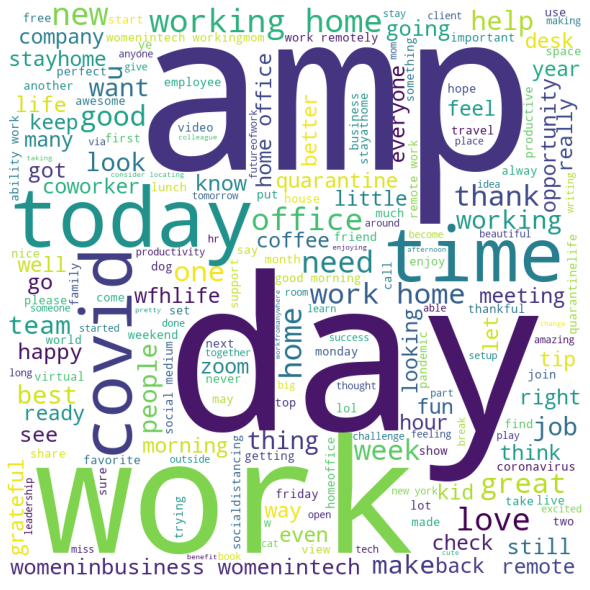

In [38]:
#generate positive sentiment word cloud
df_positive = df[df['sentiment'] == 'Positive']
tweets = ''
for tweet in df_positive['lematize_text'].values:
    tweets += ''.join(tweet)+' '
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

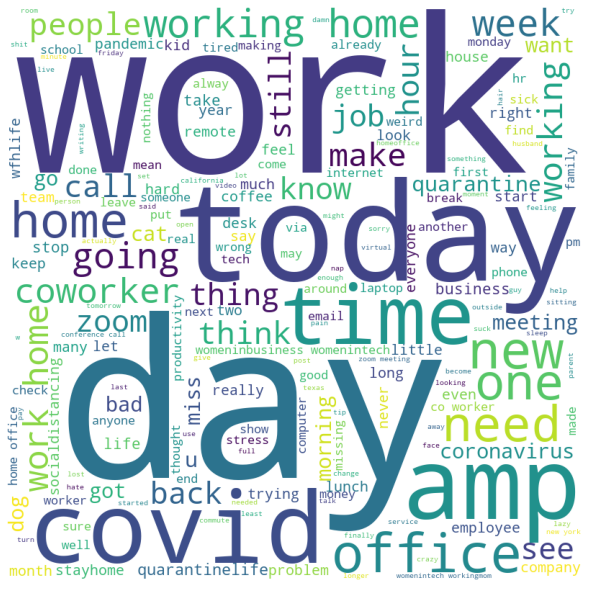

In [39]:
#generate negative sentiment word cloud
df_negative = df[df['sentiment'] == 'Negative']
tweets = ''
for tweet in df_negative['lematize_text'].values:
    tweets += ''.join(tweet)+' '
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(tweets)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()